## SGA-PMX Demo  

  This script presents an example implementation of the Simple Genetic Algorithm (SGA) with the PMX operator and its application to solving the Travelling Salesman Problem (TSP). Popular instances of the TSP problem can be found in the TSPLib library [1]. The script focuses on solving the BERLIN52 instance, in order to solve other instances it may be necessary to change the settings of the algorithm parameters and perhaps the evolutionary operators.  

Literature: [1] TSPLIB, http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/



In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import requests
import time
from matplotlib.lines import Line2D
%matplotlib inline

In [2]:
# BERLIN52

n = 52
print('Problem size: %d' % n)

coords = np.array([565.0, 575.0, 25.0, 185.0, 345.0, 750.0, 945.0, 685.0, 845.0, 655.0, 880.0, 660.0, 25.0, 230.0, 525.0, 1000.0, 580.0, 1175.0, 650.0, 1130.0, 1605.0, 620.0, 1220.0, 580.0, 1465.0, 200.0, 1530.0, 5.0, 845.0, 680.0, 725.0, 370.0, 145.0, 665.0, 415.0, 635.0, 510.0, 875.0, 560.0, 365.0, 300.0, 465.0, 520.0, 585.0, 480.0, 415.0, 835.0, 625.0, 975.0, 580.0, 1215.0, 245.0, 1320.0, 315.0, 1250.0, 400.0, 660.0, 180.0, 410.0, 250.0, 420.0, 555.0, 575.0, 665.0, 1150.0, 1160.0, 700.0, 580.0, 685.0, 595.0, 685.0, 610.0, 770.0, 610.0, 795.0, 645.0, 720.0, 635.0, 760.0, 650.0, 475.0, 960.0, 95.0, 260.0, 875.0, 920.0, 700.0, 500.0, 555.0, 815.0, 830.0, 485.0, 1170.0, 65.0, 830.0, 610.0, 605.0, 625.0, 595.0, 360.0, 1340.0, 725.0, 1740.0, 245.0])
coords = coords.reshape(n, 2)

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print('Distance matrix:\n', A)

p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
print('Optimal solution:\n', p)

Problem size: 52
Distance matrix:
 [[   0.          666.10809934  281.11385594 ...  217.08293346
   789.38267019 1220.46097848]
 [ 666.10809934    0.          649.32657423 ...  596.25917184
  1421.55724471 1716.04924172]
 [ 281.11385594  649.32657423    0.         ...  463.24939288
   995.3140208  1483.59361012]
 ...
 [ 217.08293346  596.25917184  463.24939288 ...    0.
   829.60834133 1150.76061803]
 [ 789.38267019 1421.55724471  995.3140208  ...  829.60834133
     0.          624.81997407]
 [1220.46097848 1716.04924172 1483.59361012 ... 1150.76061803
   624.81997407    0.        ]]
Optimal solution:
 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


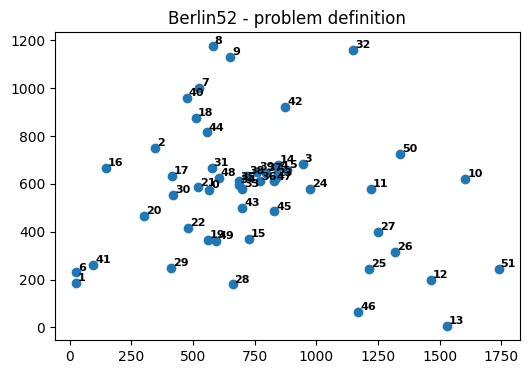

In [3]:
plt.figure(figsize=(6,4))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

plt.title('Berlin52 - problem definition')

plt.show()

<Figure size 600x400 with 0 Axes>

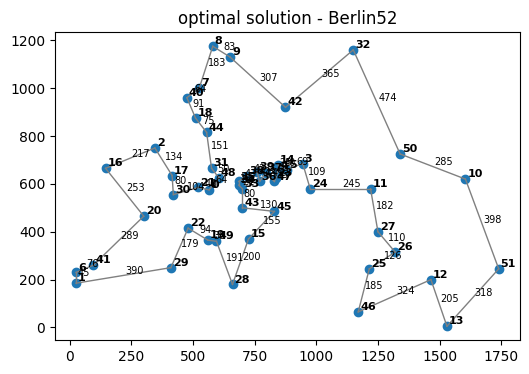

In [4]:
def plot_route(title, route):
    route = route
    plt.figure(figsize=(6,4))
    fig, ax = plt.subplots(figsize=(6,4))

    plt.plot(coords[:, 0], coords[:, 1], 'o')

    for i in range(n):
        plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

    ax.add_line(Line2D(
        [coords[0, 0], coords[route[0], 0]],
        [coords[0, 1], coords[route[0], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
            (coords[0, 1] + coords[route[0], 1])/2 + 6,
            '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
    for i in range(1, len(route)):
        ax.add_line(Line2D(
            [coords[route[i-1], 0], coords[route[i], 0]],
            [coords[route[i-1], 1], coords[route[i], 1]],
            linewidth=1, color='gray'))
        plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
                (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
                '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
    ax.add_line(Line2D(
        [coords[route[-1], 0], coords[0, 0]],
        [coords[route[-1], 1], coords[0, 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
            (coords[route[-1], 1] + coords[0, 1])/2 + 6,
            '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})

    plt.title('optimal solution - ' + title)

    plt.show()
plot_route('Berlin52', p)

### Objective function

In [5]:
def tsp_objective_function(p,A):
    s = 0.0
    for i in range(n):
        s += A[p[i-1], p[i]]
    return s

### Random Sampling

In [8]:
def random_sampling():
    t0 = time.time()

    T = 1000000

    permutations = np.empty((T, n), dtype=np.int64)
    costs = np.zeros(T)
    for i in range(T):
        permutations[i, :] = np.random.permutation(n)
        costs[i] = tsp_objective_function(permutations[i, :],A)
    time1 = time.time() - t0
    p = permutations[costs.argmin(), :]

    # print(tsp_objective_function(p), p)
    return tsp_objective_function(p, A), costs, time1

_ , costs_rs, t_rs = random_sampling()

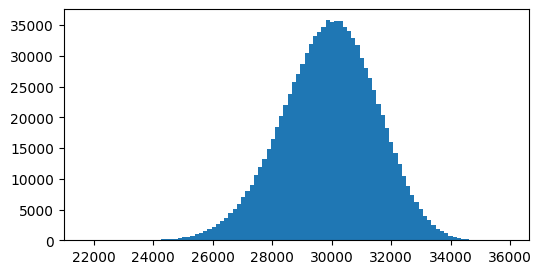

29911.651094534245 1578.3738799311886


In [9]:
plt.figure(figsize=(6,3))
plt.hist(costs_rs, bins=100)
plt.show()

print(costs_rs.mean(), costs_rs.std())

### Simulated Annealing

In [10]:
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

In [12]:
def simulated_annealing(T = 500000, radius = 1 ,alpha = 1.0):
    t0 = time.time()
    p = np.random.permutation(n)
    p_cost = tsp_objective_function(p , A)
    costs = np.zeros(T)
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = tsp_objective_function(q , A )
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
        costs[t] = p_cost
    time1 = time.time() - t0
    return p_cost, costs, time1

p_cost_sa, costs_sa, t_sa = simulated_annealing()
print(p_cost_sa, costs_sa.min(), t_sa)

9323.539014257925 9323.539014257925 35.1994571685791


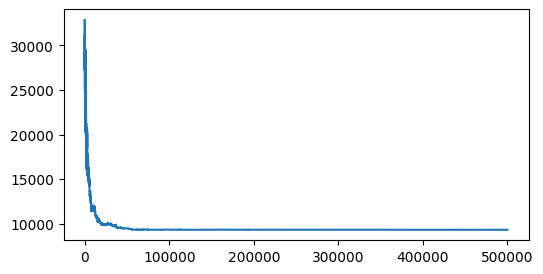

In [13]:
plt.figure(figsize=(6,3))
plt.plot(costs_sa)
plt.show()

### SGA-PMX

### (a) complete the script with the removed implementation of the PMX operator,
https://observablehq.com/@swissmanu/pmx-crossover

In [14]:
def PMX(ind1, ind2):
    i, j = np.sort(np.random.choice(len(ind1), 2, replace=False))

    p1, p2 = ind1[i:j+1], ind2[i:j+1]
    mapping_ind1 = {p1[k]: p2[k] for k in range(len(p1))}
    mapping_ind2 = {p2[k]: p1[k] for k in range(len(p2))}

    child1, child2 = ind1.copy(), ind2.copy()

    child1[i:j+1], child2[i:j+1] = p2, p1

    for k in range(i):
        while child1[k] in mapping_ind2:
            child1[k] = mapping_ind2[child1[k]]
        while child2[k] in mapping_ind1:
            child2[k] = mapping_ind1[child2[k]]

    for k in range(j+1, len(ind1)):
        while child1[k] in mapping_ind2:
            child1[k] = mapping_ind2[child1[k]]
        while child2[k] in mapping_ind1:
            child2[k] = mapping_ind1[child2[k]]

    return child1, child2


In [15]:
def reverse_sequence_mutation(p):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    q[i:j+1] = q[i:j+1][::-1]
    return q

In [16]:
def SGA(
    population_size = 1000,
    chromosome_length = n,
    crossover_probability = 0.95,
    mutation_probability = 0.25,
    number_of_iterations = 250,
    mutation = reverse_sequence_mutation,
    dist_matrix = A,
    objective_function = tsp_objective_function,
    crossover = PMX,
    log = False,
    optimal_solution = None
):
    time0 = time.time()
    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))
    number_of_offspring = population_size

    cost_values = []

    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)

    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] = objective_function(current_population[i, :], dist_matrix)

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = crossover(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]

        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = mutation(children_population[i, :])

        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] = objective_function(children_population[i, :], dist_matrix)

        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])

        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]

        # recording some statistics
        cost_values.append([objective_values.min(), objective_values.mean(), objective_values.max()])
        if best_objective_value > objective_values[0]:
            best_objective_value = objective_values[0]
            best_chromosome = current_population[0, :]
        time_SGA = time.time() - time0
        if t%20==0 and log==True:
            print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))
            if optimal_solution == objective_values.min():
                return cost_values, best_objective_value, best_chromosome, current_population, time_SGA
    return cost_values, best_objective_value, best_chromosome, current_population, time_SGA

In [17]:
cost_values, best_objective_value, best_chromosom, current_population, time_SGA= SGA(
    population_size=1000, mutation_probability=0.2, crossover_probability=0.95,log=True)

  0     0.10396838 23390.81979563 28496.11616801 29815.87201927 1074.27758062
 20     1.44202352 16765.12850615 18677.81442070 19390.80207664 498.69673840
 40     2.68408394 12624.45337959 13590.93470825 13924.88587394 247.38833161
 60     3.85677862 10250.77166478 10898.58889297 11060.63557859 121.23759893
 80     5.01840496 9348.12275828 9590.65976848 9639.03084375  49.60521688
100     6.15989065 8861.24514025 8890.14112779 8900.23058100   8.66100949
120     7.29136562 8661.49481030 8661.49481030 8661.49481030   0.00000000
140     8.43423104 8638.53272397 8638.53272397 8638.53272397   0.00000000
160     9.57655048 8638.53272397 8638.53272397 8638.53272397   0.00000000
180    11.65184259 8638.53272397 8638.53272397 8638.53272397   0.00000000
200    13.15645695 8638.53272397 8638.53272397 8638.53272397   0.00000000
220    14.29677725 8638.53272397 8638.53272397 8638.53272397   0.00000000
240    15.44395161 8638.53272397 8638.53272397 8638.53272397   0.00000000


<Figure size 600x400 with 0 Axes>

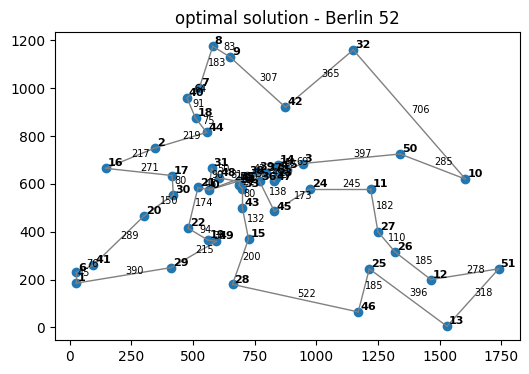

In [18]:
plot_route('Berlin 52' ,current_population[0])

### b) run the script for an instance of Berlin52 and compare the results of the three placed methods of solving the problem (repeat the calculations several times),

In [19]:
rs_data = []
sa_data = []
sga_data = []

In [20]:
for i in range(10):
    p_cost, costs_rs, t_rs = random_sampling()
    rs_data.append([p_cost, costs_rs, t_rs])
    p_cost_sa, costs_sa, t_sa = simulated_annealing()
    sa_data.append([p_cost_sa, costs_sa, t_sa])
    cost_values, best_objective_value, _, _, t_SGA= SGA(log=False)
    sga_data.append([best_objective_value, cost_values, t_SGA])


RS avg time: 35.09817974567413
SA avg time: 37.361331534385684
SGA avg time: 16.566023540496825


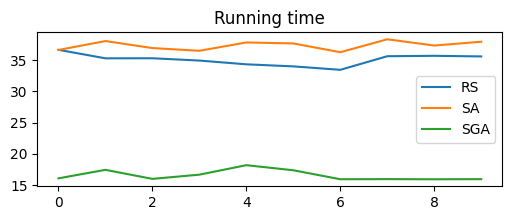

In [21]:
t_rs = [l[2] for l in rs_data]
t_sa = [l[2] for l in sa_data]
t_SGA = [l[2] for l in sga_data]
print(f'RS avg time: {sum(t_rs)/10}')
print(f'SA avg time: {sum(t_sa)/10}')
print(f'SGA avg time: {sum(t_SGA)/10}')
plt.figure(figsize=(6, 2))
plt.plot(t_rs, label='RS')
plt.plot(t_sa, label='SA')
plt.plot(t_SGA, label='SGA')
plt.title('Running time')
plt.legend()
plt.show()

RS min cost: 20678.357400355744
SA min cost: 8162.332083743
SGA min cost: 7735.798385217678


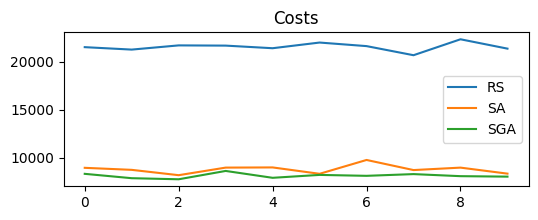

In [22]:
p_cost = [l[0] for l in rs_data]
p_cost_sa = [l[0] for l in sa_data]
best_objective_value = [l[0] for l in sga_data]
print(f'RS min cost: {min(p_cost)}')
print(f'SA min cost: {min(p_cost_sa)}')
print(f'SGA min cost: {min(best_objective_value)}')
plt.figure(figsize=(6, 2))
plt.plot(p_cost, label='RS')
plt.plot(p_cost_sa, label='SA')
plt.plot(best_objective_value, label='SGA')
plt.title('Costs')
plt.legend()
plt.show()

### c) plot the changes in the value of the objective function in successive iterations of the evolutionary algorithm, similar to the plot for simulated annealing,

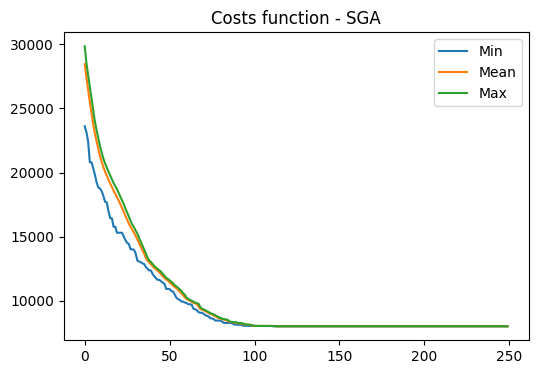

In [23]:
def plot_costs_v(cost_valuesm, title):
    plt.figure(figsize=(6, 4))
    plt.plot(cost_values)
    plt.title('Costs function - '+str(title))
    plt.legend(['Min', 'Mean', 'Max'], loc='upper right')
    plt.show()
plot_costs_v(cost_values,'SGA')

### d) instead of the Reverse Sequence Mutation, try a mutation involving the transposition of two randomly selected elements of a permutation

In [24]:
np.random.choice(len(p), 2, False)

array([21, 34])

In [25]:
def random_mutation(p):
    rn = np.random.choice(len(p),2, False)
    i, j = rn.min(), rn.max()
    c_p = p.copy()
    c_p[i], c_p[j] = c_p[j], c_p[i]
    return c_p

  0     0.16972184 24059.86801764 28420.94801143 29744.76372561 1046.31228643
 20     2.69061112 15260.92137704 17400.20821222 17900.38284242 440.10008678
 40     3.96425676 12076.92541896 12817.17993126 12987.61149038 134.61211053
 60     5.14094496 10829.21388827 10996.28005118 11070.60164966  59.33290788
 80     6.30656624 10463.73545644 10499.93526655 10525.77227108   6.44748597
100     7.45368361 10236.02047000 10236.02047000 10236.02047000   0.00000000
120     8.60564446 10211.37188259 10216.89175063 10216.89727602   0.17464090
140     9.73607397 10211.37188259 10211.37188259 10211.37188259   0.00000000
160    10.90886545 10211.37188259 10211.37188259 10211.37188259   0.00000000
180    12.05283689 10211.37188259 10211.37188259 10211.37188259   0.00000000
200    13.53245974 10211.37188259 10211.37188259 10211.37188259   0.00000000
220    15.65573597 10211.37188259 10211.37188259 10211.37188259   0.00000000
240    16.78390145 10211.37188259 10211.37188259 10211.37188259   0.0000000

<Figure size 600x400 with 0 Axes>

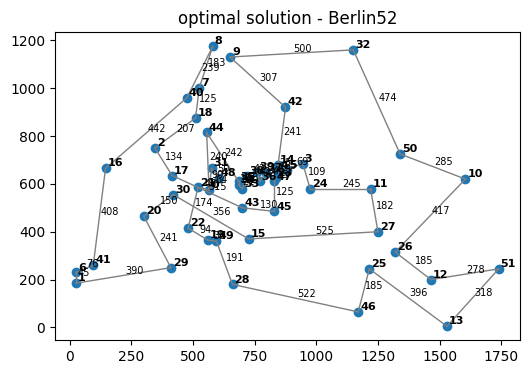

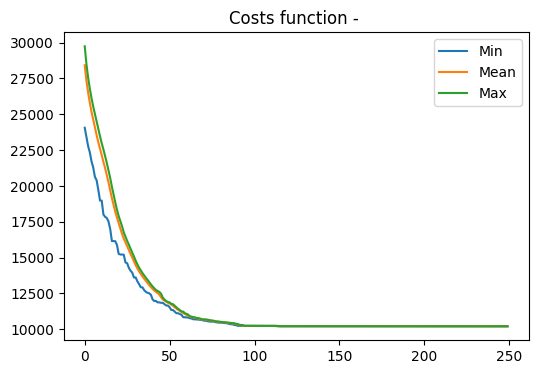

In [26]:
cost_values, _, _, current_population, _ = SGA(mutation=random_mutation, log = True)
plot_route('Berlin52',current_population[0])
plot_costs_v(cost_values,'')


### (d) check the performance of the algorithm on other instances of the comoving problem (at least bayg29, bays29, kroA100, kroA150, kroA200).

In [27]:
def parse_data(url):
    data = {
        'name': None,
        'n': None,
        'dist': None,
        'coords': None,
        'p': []
    }
    last_section = ""
    response = requests.get(url)
    lines = response.text.split('\n')
    for line in lines:
        elements = line.strip().split()
        section_type = elements[0]
        if section_type == 'NAME:':
            data['name'] = elements[1]
            last_section = section_type

        elif section_type.startswith("DIMENSION"):
            data['n'] = int(elements[-1])
            last_section = section_type

        elif section_type == "EDGE_WEIGHT_SECTION":
            last_section = section_type

        elif section_type in ["DISPLAY_DATA_SECTION", "NODE_COORD_SECTION"]:
            last_section = section_type

        elif section_type == "TOUR_SECTION" or section_type == "EOF":
            last_section = section_type
            if section_type == "EOF":
                break
        else:
            if last_section == "EDGE_WEIGHT_SECTION":
                elements = np.array(list(map(int, elements)))
                if len(elements) < 29:  # If the distance matrix is incomplete
                    elements = np.hstack((np.zeros(29 - len(elements)), elements))
                if 'dist' in data:
                    data['dist'] = np.vstack((data['dist'], elements)) if data['dist'] is not None else elements
                else:
                    data['dist'] = elements
            elif last_section in ["DISPLAY_DATA_SECTION", "NODE_COORD_SECTION"]:
                elements = list(map(float, elements[1:]))
                if 'coords' in data:
                    data['coords'] = np.vstack((data['coords'], np.array(elements))) if data['coords'] is not None else np.array(elements)
                else:
                    data['coords'] = np.array(elements)

            elif last_section == "TOUR_SECTION" and elements[0] != '-1':
                element = int(elements[0])
                data['p'].append(element - 1)
    return data

### bayg29

In [28]:
bayg29 = parse_data('https://github.com/pdrozdowski/TSPLib.Net/raw/master/TSPLIB95/tsp/bayg29.tsp')
bayg29_opt = parse_data('https://github.com/pdrozdowski/TSPLib.Net/raw/master/TSPLIB95/tsp/bayg29.opt.tour')

In [29]:
bayg29_dist = bayg29['dist']
n = bayg29['n']
p = bayg29_opt['p']
coords = bayg29['coords']

A = np.vstack((bayg29_dist, np.zeros(n)))
A += A.T
print()

  0     0.07661152 3293.00000000 4410.79200000 4704.00000000 221.46272087
 20     0.98364758 2026.00000000 2155.77800000 2193.00000000  33.65193480
 40     1.87969422 1694.00000000 1745.01200000 1770.00000000  16.59276517
 60     2.72923517 1670.00000000 1670.00000000 1670.00000000   0.00000000
 80     3.55657315 1670.00000000 1670.00000000 1670.00000000   0.00000000
100     4.38978887 1670.00000000 1670.00000000 1670.00000000   0.00000000
120     5.24828672 1670.00000000 1670.00000000 1670.00000000   0.00000000
140     6.07343960 1670.00000000 1670.00000000 1670.00000000   0.00000000
160     7.01606464 1670.00000000 1670.00000000 1670.00000000   0.00000000
180     8.56765389 1670.00000000 1670.00000000 1670.00000000   0.00000000
200     9.81538939 1670.00000000 1670.00000000 1670.00000000   0.00000000
220    10.65642881 1670.00000000 1670.00000000 1670.00000000   0.00000000
240    11.49411035 1670.00000000 1670.00000000 1670.00000000   0.00000000


<Figure size 600x400 with 0 Axes>

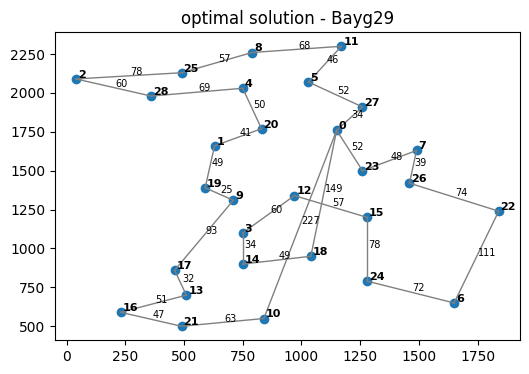

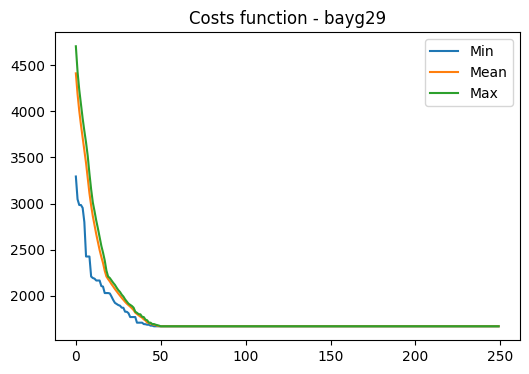

In [30]:
cost_values, best_objective_value, best_chromosom, current_population, time_SGA= SGA(
    dist_matrix=A,chromosome_length=n ,log=True)
plot_route('Bayg29',current_population[0])
plot_costs_v(cost_values,'bayg29')

### bays29

In [31]:
bays29 = parse_data('https://github.com/pdrozdowski/TSPLib.Net/raw/master/TSPLIB95/tsp/bays29.tsp')
bays29_opt = parse_data('https://github.com/pdrozdowski/TSPLib.Net/raw/master/TSPLIB95/tsp/bays29.opt.tour')

In [32]:
A = bays29['dist']
n = bays29['n']
p = bays29_opt['p']
coords = bays29['coords']

  0     0.07450414 4520.00000000 5607.75300000 5960.00000000 272.53032123
 20     1.07820868 2679.00000000 2976.67200000 3073.00000000  80.11412120
 40     2.03216410 2070.00000000 2110.07800000 2130.00000000  11.48886052
 60     2.96998811 2068.00000000 2068.00000000 2068.00000000   0.00000000
 80     3.90223622 2068.00000000 2068.00000000 2068.00000000   0.00000000
100     4.83452177 2068.00000000 2068.00000000 2068.00000000   0.00000000
120     5.76414227 2068.00000000 2068.00000000 2068.00000000   0.00000000
140     7.27043343 2068.00000000 2068.00000000 2068.00000000   0.00000000
160     8.91775489 2068.00000000 2068.00000000 2068.00000000   0.00000000
180    10.55073786 2068.00000000 2068.00000000 2068.00000000   0.00000000
200    12.05283809 2068.00000000 2068.00000000 2068.00000000   0.00000000
220    12.98066592 2068.00000000 2068.00000000 2068.00000000   0.00000000
240    13.90150666 2068.00000000 2068.00000000 2068.00000000   0.00000000


<Figure size 600x400 with 0 Axes>

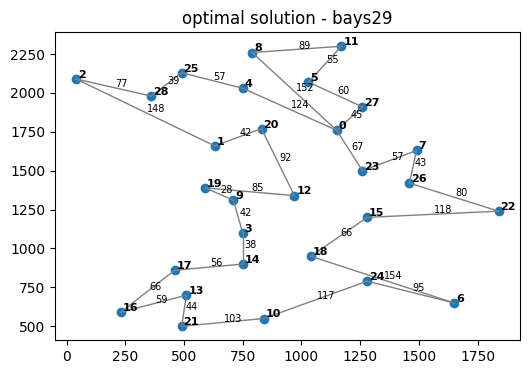

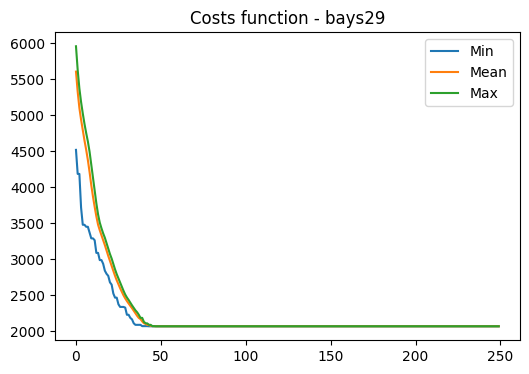

In [33]:
cost_values, best_objective_value, best_chromosom, current_population, time_SGA= SGA(dist_matrix=A,chromosome_length=n ,log=True)
plot_route('bays29', current_population[0])
plot_costs_v(cost_values,'bays29')

### kroA100

In [34]:
kroA100 = parse_data("https://github.com/pdrozdowski/TSPLib.Net/raw/master/TSPLIB95/tsp/kroA100.tsp")
kroA100_opt = parse_data('https://github.com/pdrozdowski/TSPLib.Net/raw/master/TSPLIB95/tsp/kroA100.opt.tour')

In [35]:
n = kroA100['n']
coords = kroA100['coords']
A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())

p = kroA100_opt['p']

  0     0.16294169 143080.71262212 163285.15264510 170000.00382320 5108.64452506
 20     2.22520876 107717.07855969 116648.83992136 118625.75156349 1564.93249951
 40     5.55524468 86943.27367963 92257.06309768 94027.84690165 1387.22487190
 60     7.42696691 69225.83493215 72922.33455782 73856.93237339 733.94632098
 80     9.29646993 58189.65017896 60676.23424124 61373.72052620 639.86088500
100    11.15092278 48076.84452489 50298.71759891 50982.07669462 570.35142777
120    12.99950576 42279.90458048 43348.64196246 43724.93234384 219.82270518
140    14.84997416 38237.98588405 39086.24801902 39256.98243484 140.64488520
160    17.73076344 34792.94947821 35587.84036950 35842.54539550 206.61573447
180    19.89383960 30396.16827393 31179.74605108 31444.86821664 176.80834344
200    21.73098969 28204.16798831 28703.45452711 28706.88589693  36.33192507
220    23.55321407 26113.86020377 26311.77518661 26365.15039441  84.87830008
240    25.40076280 24265.63642978 24516.64367186 24816.30368723 148

<Figure size 600x400 with 0 Axes>

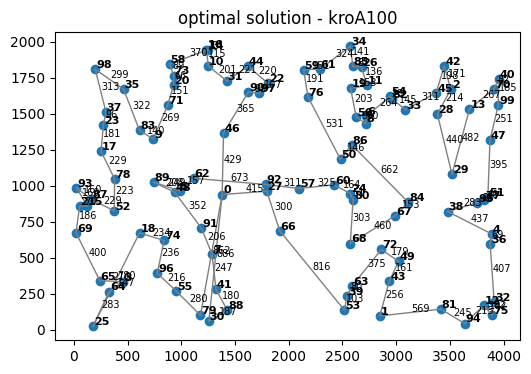

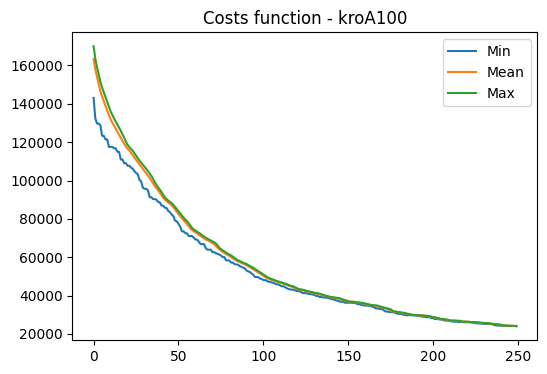

In [36]:
cost_values, best_objective_value, best_chromosom, current_population, time_SGA= SGA(dist_matrix=A,chromosome_length=n ,log=True)
plot_route('kroA100',current_population[0])
plot_costs_v(cost_values,'kroA100')

### kroA150

In [37]:
kroA150 = parse_data("https://github.com/pdrozdowski/TSPLib.Net/raw/master/TSPLIB95/tsp/kroA150.tsp")

In [38]:
n = kroA150['n']
coords = kroA150['coords']
A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())

In [ ]:
cost_values, best_objective_value, best_chromosom, current_population, time_SGA= SGA(dist_matrix=A,chromosome_length=n ,number_of_iterations = 500, log=True)
plot_route('kroA150',current_population[0])
plot_costs_v(cost_values,'kroA150 - 500iters')

  0     0.23017931 225481.79993973 248849.00436522 256482.92495787 5843.29376763
 20     4.56245804 178806.74266121 190182.39490731 193216.83515031 2530.08888240


### kroA200

In [ ]:
kroA200 = parse_data("https://github.com/pdrozdowski/TSPLib.Net/raw/master/TSPLIB95/tsp/kroA200.tsp")

In [ ]:
n = kroA200['n']
coords = kroA200['coords']
A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())

In [ ]:
cost_values, best_objective_value, best_chromosom, current_population, time_SGA= SGA(dist_matrix=A,chromosome_length=n ,number_of_iterations = 500, log=True)
plot_route('kroA200',current_population[0])
plot_costs_v(cost_values,'kroA150 - 500 iters')

# P2

Extend the evolutionary algorithm by adding or changing the crossover and mutation operators (according to your own ideas, you can also check the popular operators OX, CX, PBX, OBX, PPX, LCSX, LOX in the literature on the subject). Analyse the performance of the new algorithm and the results obtained.

In [ ]:
# BERLIN52
n = 52
print('Problem size: %d' % n)

coords = np.array([565.0, 575.0, 25.0, 185.0, 345.0, 750.0, 945.0, 685.0, 845.0, 655.0, 880.0, 660.0, 25.0, 230.0, 525.0, 1000.0, 580.0, 1175.0, 650.0, 1130.0, 1605.0, 620.0, 1220.0, 580.0, 1465.0, 200.0, 1530.0, 5.0, 845.0, 680.0, 725.0, 370.0, 145.0, 665.0, 415.0, 635.0, 510.0, 875.0, 560.0, 365.0, 300.0, 465.0, 520.0, 585.0, 480.0, 415.0, 835.0, 625.0, 975.0, 580.0, 1215.0, 245.0, 1320.0, 315.0, 1250.0, 400.0, 660.0, 180.0, 410.0, 250.0, 420.0, 555.0, 575.0, 665.0, 1150.0, 1160.0, 700.0, 580.0, 685.0, 595.0, 685.0, 610.0, 770.0, 610.0, 795.0, 645.0, 720.0, 635.0, 760.0, 650.0, 475.0, 960.0, 95.0, 260.0, 875.0, 920.0, 700.0, 500.0, 555.0, 815.0, 830.0, 485.0, 1170.0, 65.0, 830.0, 610.0, 605.0, 625.0, 595.0, 360.0, 1340.0, 725.0, 1740.0, 245.0])
coords = coords.reshape(n, 2)

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
# print('Distance matrix:\n', A)

p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
# print('Optimal solution:\n', p)

https://github.com/DEAP/deap/tree/master/deap/tools

In [ ]:
def OX(ind1, ind2):
    size = min(len(ind1), len(ind2))
    a, b = random.sample(range(size), 2)
    if a > b:
        a, b = b, a

    holes1, holes2 = [True] * size, [True] * size
    for i in range(size):
        if i < a or i > b:
            holes1[ind2[i]] = False
            holes2[ind1[i]] = False

    temp1, temp2 = ind1, ind2
    k1, k2 = b + 1, b + 1
    for i in range(size):
        if not holes1[temp1[(i + b + 1) % size]]:
            ind1[k1 % size] = temp1[(i + b + 1) % size]
            k1 += 1

        if not holes2[temp2[(i + b + 1) % size]]:
            ind2[k2 % size] = temp2[(i + b + 1) % size]
            k2 += 1
    for i in range(a, b + 1):
        ind1[i], ind2[i] = ind2[i], ind1[i]

    return ind1, ind2

In [ ]:
def CX(ind1, ind2):
    d1 = {ind1[k] : k for k in range(len(ind1))}
    child1 = list(range(len(ind1)))
    child2 = list(range(len(ind2)))
    elements = set()

    parent = -1
    for i in range(len(ind1)):
        if ind1[i] not in elements:
            parent *= -1
            idx = i
            first = True
            while idx != i or first:
                first = False
                elements.add(ind1[idx])
                if parent == 1:
                    child1[idx] = ind1[idx]
                    child2[idx] = ind2[idx]
                else:
                    child1[idx] = ind2[idx]
                    child2[idx] = ind1[idx]
                idx = d1[ind2[idx]]
    return child1, child2

In [ ]:
def PBX(ind1, ind2):
    n = len(ind1)
    r1 = np.random.rand(n)
    r2 = np.random.rand(n)
    chld1 = [-1] * n
    chld2 = [-1] * n
    for i in range(n):
        if (r1 < 0.5)[i]:
            chld1[i] = ind1[i]
        if (r2 < 0.5)[i]:
            chld2[i] = ind2[i]

    used1 = set(ind1[r1 < 0.5])
    used2 = set(ind2[r2 < 0.5])

    un_used1 = [x for x in ind2 if x not in used1][::-1]
    un_used2 = [x for x in ind1 if x not in used2][::-1]

    for i in range(n):
        if chld1[i] == -1:
            chld1[i] = un_used1.pop()

        if chld2[i] == -1:
            chld2[i] = un_used2.pop()
    return chld1, chld2

In [ ]:
crossovers = [OX, CX, PBX]

In [ ]:
for i in crossovers:
    cost_values, best_objective_value, best_chromosom, current_population, time_SGA= SGA(
        population_size=500, mutation_probability=0.2, crossover=i, log=False)
    min_cost = str(format(cost_values[-1][-1],'.2f'))
    plot_route('Berlin 52 - min cost:'+min_cost,current_population[0])
    plot_costs_v(cost_values,'crossover:'+ i.__name__ + ' min cost:' +min_cost)

# P3
Try to improve the evolutionary algorithm from Task 1 by introducing an additional mutation consisting in a local search (for a given initial permutation, we check all permutations differing from it at no more than K positions and the initial permutation initial permutation is replaced by the best one found) and iterated local search (for a given initial permutation, we check all permutations differing from it at permutation at no more than K positions, replace the initial permutation with the best one found and we repeat the procedure as long as the solution can be improved).

In [ ]:
def tsp_objective_function(p, dist_matrix = A):
    s = 0.0
    for i in range(n):
        s += dist_matrix[p[i-1], p[i]]
    return s

In [ ]:
# BERLIN52
n = 52
print('Problem size: %d' % n)

coords = np.array([565.0, 575.0, 25.0, 185.0, 345.0, 750.0, 945.0, 685.0, 845.0, 655.0, 880.0, 660.0, 25.0, 230.0, 525.0, 1000.0, 580.0, 1175.0, 650.0, 1130.0, 1605.0, 620.0, 1220.0, 580.0, 1465.0, 200.0, 1530.0, 5.0, 845.0, 680.0, 725.0, 370.0, 145.0, 665.0, 415.0, 635.0, 510.0, 875.0, 560.0, 365.0, 300.0, 465.0, 520.0, 585.0, 480.0, 415.0, 835.0, 625.0, 975.0, 580.0, 1215.0, 245.0, 1320.0, 315.0, 1250.0, 400.0, 660.0, 180.0, 410.0, 250.0, 420.0, 555.0, 575.0, 665.0, 1150.0, 1160.0, 700.0, 580.0, 685.0, 595.0, 685.0, 610.0, 770.0, 610.0, 795.0, 645.0, 720.0, 635.0, 760.0, 650.0, 475.0, 960.0, 95.0, 260.0, 875.0, 920.0, 700.0, 500.0, 555.0, 815.0, 830.0, 485.0, 1170.0, 65.0, 830.0, 610.0, 605.0, 625.0, 595.0, 360.0, 1340.0, 725.0, 1740.0, 245.0])
coords = coords.reshape(n, 2)

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
# print('Distance matrix:\n', A)

p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
# print('Optimal solution:\n', p)

# p4
Use the implemented algorithm to solve the QAP problem. Use test data from the QAPLIB library. Perform calculations for at least the following data sets: Nug12, Nug14, ... Nug30, Tai50a, Tai60a, Tai80a. Analyze the operation of the algorithm and the results obtained.

In [ ]:
import urllib.request

In [ ]:
def get_nug(no, tai = False):
    if tai == True:
        QAP_INSTANCE_URL = f'https://coral.ise.lehigh.edu/wp-content/uploads/2014/07/data.d/{no}.dat'
    else:
        QAP_INSTANCE_URL = f'https://qaplib.mgi.polymtl.ca/data.d/nug{no}.dat'
    qap_instance_file = urllib.request.urlopen(QAP_INSTANCE_URL)

    line = qap_instance_file.readline()
    n = int(line.decode()[:-1].split()[0])
    # print('Problem size: %d' % n)

    A = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        if len(line) < 2:
            continue
        A[i, :] = list(map(int, line.decode()[:-1].split()))
    # print('Flow matrix:\n', A)

    B = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        if len(line) < 2:
            continue
        B[i, :] = list(map(int, line.decode()[:-1].split()))
    # print('Distance matrix:\n', B)

    return n, A, B

In [ ]:
def qap_objective_function(p,A):
    n = len(p)
    s = 0.0
    for i in range(n):
        s += (A[i, :] * B[p, p[i]]).sum()
    return s

In [ ]:
instances = [12,14, 15, '16a' ,'16b', 17, 18, 20, 21, 22, 24, 25, 27, 28, 30]
optimal_solutions = [578, 1014, 1150, 1610 , 1240, 1732, 1930, 2570, 2438, 3596, 3488, 3744, 5234, 5166, 6124]
for i in range(len(instances)):
    n,A,B = get_nug(instances[i])
    cost_values, best_objective_value, best_chromosom, current_population, time_SGA= SGA(
    crossover= PMX,
    objective_function= qap_objective_function,
    crossover_probability = 0.9,
    chromosome_length = n,
    dist_matrix= A,
    number_of_iterations = 250,
    log=True,
    optimal_solution=optimal_solutions[i])
    min_cost = cost_values[-1][-1]
    plot_costs_v(cost_values, f'Nug {str(instances[i])} - min cost:{min_cost} - optimal:{optimal_solutions[i]}')

###  Tai50a, Tai60a, Tai80a

In [ ]:
instances = ['tai50a', 'tai60a', 'tai80a']
optimal_solutions = [4390920, 6325978, 11657010]
for i in range(len(instances)):
    n,A,B = get_nug(instances[i], tai = True)
    cost_values, best_objective_value, best_chromosom, current_population, time_SGA= SGA(
    crossover= PMX,
    objective_function= qap_objective_function,
    chromosome_length = n,
    dist_matrix= A,
    number_of_iterations = 250,
    log=True)
    min_cost = cost_values[-1][-1]
    plot_costs_v(cost_values, f'Nug {str(instances[i])} - min cost:{min_cost} - optimal:{optimal_solutions[i]}')